In [11]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt

In [3]:
df = pd.read_csv("data/owid-covid-data.csv")

In [4]:
df_sweden = df[df['location'] == 'Sweden']


In [31]:
world = gpd.read_file("ne_10m_admin_1_states_provinces.dbf", encoding="utf-8")
swe = world[world['admin'] == 'Sweden']  

In [54]:
swe['name']

162          Norrbotten
164        Västerbotten
165            Jämtland
169             Dalarna
170            Värmland
173     Västra Götaland
2393     Västernorrland
2394          Gävleborg
2395            Uppsala
2396          Stockholm
2397       Södermanland
2398       Östergötland
2399             Kalmar
2400           Blekinge
2401              Skåne
2402            Halland
2893            Gotland
3401        Västmanland
3402          Jönköping
3403             Orebro
3404          Kronoberg
Name: name, dtype: object

In [52]:
municipality_region_dict = {
    "Arvidsjaur": "Norrbotten", "Arjeplog": "Norrbotten", "Boden": "Norrbotten", "Gällivare": "Norrbotten",
    "Haparanda": "Norrbotten", "Jokkmokk": "Norrbotten", "Kalix": "Norrbotten", "Kiruna": "Norrbotten",
    "Luleå": "Norrbotten", "Pajala": "Norrbotten", "Piteå": "Norrbotten", "Älvsbyn": "Norrbotten",
    "Överkalix": "Norrbotten", "Övertorneå": "Norrbotten",
    "Bjurholm": "Västerbotten", "Dorotea": "Västerbotten", "Lycksele": "Västerbotten", "Malå": "Västerbotten",
    "Nordmaling": "Västerbotten", "Norsjö": "Västerbotten", "Robertsfors": "Västerbotten", "Skellefteå": "Västerbotten",
    "Sorsele": "Västerbotten", "Storuman": "Västerbotten", "Umeå": "Västerbotten", "Vilhelmina": "Västerbotten",
    "Vindeln": "Västerbotten", "Vännäs": "Västerbotten", "Åsele": "Västerbotten",
    "Berg": "Jämtland", "Bräcke": "Jämtland", "Härjedalen": "Jämtland", "Krokom": "Jämtland",
    "Ragunda": "Jämtland", "Strömsund": "Jämtland", "Åre": "Jämtland", "Östersund": "Jämtland",
    "Avesta": "Dalarna", "Borlänge": "Dalarna", "Falun": "Dalarna", "Gagnef": "Dalarna",
    "Hedemora": "Dalarna", "Leksand": "Dalarna", "Ludvika": "Dalarna", "Malung-Sälen": "Dalarna",
    "Mora": "Dalarna", "Orsa": "Dalarna", "Rättvik": "Dalarna", "Smedjebacken": "Dalarna",
    "Säter": "Dalarna", "Vansbro": "Dalarna", "Älvdalen": "Dalarna",
    "Arvika": "Värmland", "Eda": "Värmland", "Filipstad": "Värmland", "Forshaga": "Värmland",
    "Grums": "Värmland", "Hagfors": "Värmland", "Hammarö": "Värmland", "Karlstad": "Värmland",
    "Kil": "Värmland", "Kristinehamn": "Värmland", "Munkfors": "Värmland", "Storfors": "Värmland",
    "Sunne": "Värmland", "Säffle": "Värmland", "Torsby": "Värmland",
    "Ale": "Västra Götaland", "Alingsås": "Västra Götaland", "Bengtsfors": "Västra Götaland", "Bollebygd": "Västra Götaland",
    "Borås": "Västra Götaland", "Dals-Ed": "Västra Götaland", "Essunga": "Västra Götaland", "Falköping": "Västra Götaland",
    "Färgelanda": "Västra Götaland", "Grästorp": "Västra Götaland", "Gullspång": "Västra Götaland", "Göteborg": "Västra Götaland",
    "Herrljunga": "Västra Götaland", "Hjo": "Västra Götaland", "Härryda": "Västra Götaland",
    "Karlsborg": "Västra Götaland", "Kungälv": "Västra Götaland", "Lerum": "Västra Götaland", "Lidköping": "Västra Götaland",
    "Lilla Edet": "Västra Götaland", "Lysekil": "Västra Götaland", "Mariestad": "Västra Götaland",
    "Mark": "Västra Götaland", "Mellerud": "Västra Götaland", "Mölndal": "Västra Götaland", "Munkedal": "Västra Götaland",
    "Orust": "Västra Götaland", "Partille": "Västra Götaland", "Skara": "Västra Götaland", "Skövde": "Västra Götaland",
    "Sotenäs": "Västra Götaland", "Stenungsund": "Västra Götaland", "Strömstad": "Västra Götaland", "Svenljunga": "Västra Götaland",
    "Tanum": "Västra Götaland", "Tibro": "Västra Götaland", "Tidaholm": "Västra Götaland",
    "Tjörn": "Västra Götaland", "Tranemo": "Västra Götaland", "Trollhättan": "Västra Götaland", "Töreboda": "Västra Götaland",
    "Uddevalla": "Västra Götaland", "Ulricehamn": "Västra Götaland", "Vara": "Västra Götaland",
    "Vårgårda": "Västra Götaland", "Vänersborg": "Västra Götaland", "Åmål": "Västra Götaland", "Öckerö": "Västra Götaland",
    "Härnösand": "Västernorrland", "Kramfors": "Västernorrland", "Sollefteå": "Västernorrland", "Sundsvall": "Västernorrland",
    "Timrå": "Västernorrland", "Ånge": "Västernorrland", "Örnsköldsvik": "Västernorrland",
    "Bollnäs": "Gävleborg", "Gävle": "Gävleborg", "Hofors": "Gävleborg", "Hudiksvall": "Gävleborg",
    "Ljusdal": "Gävleborg", "Nordanstig": "Gävleborg", "Ockelbo": "Gävleborg",
    "Ovanåker": "Gävleborg", "Sandviken": "Gävleborg", "Söderhamn": "Gävleborg",
    "Enköping": "Uppsala", "Heby": "Uppsala", "Håbo": "Uppsala", "Knivsta": "Uppsala",
    "Tierp": "Uppsala", "Uppsala": "Uppsala", "Älvkarleby": "Uppsala", "Östhammar": "Uppsala",
    "Botkyrka": "Stockholm", "Danderyd": "Stockholm", "Ekerö": "Stockholm", "Haninge": "Stockholm",
    "Huddinge": "Stockholm", "Järfälla": "Stockholm", "Lidingö": "Stockholm", "Nacka": "Stockholm",
    "Norrtälje": "Stockholm", "Nykvarn": "Stockholm", "Nynäshamn": "Stockholm", "Salem": "Stockholm",
    "Sigtuna": "Stockholm", "Sollentuna": "Stockholm", "Solna": "Stockholm",
    "Stockholm": "Stockholm", "Sundbyberg": "Stockholm", "Södertälje": "Stockholm", "Tyresö": "Stockholm",
    "Täby": "Stockholm", "Upplands-Bro": "Stockholm", "Upplands Väsby": "Stockholm",
    "Vallentuna": "Stockholm", "Vaxholm": "Stockholm", "Värmdö": "Stockholm", "Österåker": "Stockholm",
    "Eskilstuna": "Södermanland", "Flen": "Södermanland", "Gnesta": "Södermanland", "Katrineholm": "Södermanland",
    "Nyköping": "Södermanland", "Oxelösund": "Södermanland", "Strängnäs": "Södermanland",
    "Trosa": "Södermanland", "Vingåker": "Södermanland",
    "Boxholm": "Östergötland", "Finspång": "Östergötland", "Kinda": "Östergötland", "Linköping": "Östergötland",
    "Mjölby": "Östergötland", "Motala": "Östergötland", "Norrköping": "Östergötland",
    "Söderköping": "Östergötland", "Vadstena": "Östergötland", "Valdemarsvik": "Östergötland", "Ydre": "Östergötland",
    "Åtvidaberg": "Östergötland", "Ödeshög": "Östergötland",
    "Borgholm": "Kalmar", "Emmaboda": "Kalmar", "Hultsfred": "Kalmar", "Högsby": "Kalmar",
    "Kalmar": "Kalmar", "Mönsterås": "Kalmar", "Mörbylånga": "Kalmar",
    "Nybro": "Kalmar", "Oskarshamn": "Kalmar", "Torsås": "Kalmar", "Vimmerby": "Kalmar", "Västervik": "Kalmar",
    "Karlshamn": "Blekinge", "Karlskrona": "Blekinge", "Olofström": "Blekinge", "Ronneby": "Blekinge", "Sölvesborg": "Blekinge",
    "Bjuv": "Skåne", "Bromölla": "Skåne", "Burlöv": "Skåne", "Båstad": "Skåne", "Eslöv": "Skåne", "Helsingborg": "Skåne", "Hässleholm": "Skåne",
    "Höganäs": "Skåne", "Hörby": "Skåne", "Höör": "Skåne", "Klippan": "Skåne", "Kristianstad": "Skåne", "Kävlinge": "Skåne", "Landskrona": "Skåne",
    "Lomma": "Skåne", "Lund": "Skåne", "Malmö": "Skåne", "Osby": "Skåne", "Perstorp": "Skåne", "Simrishamn": "Skåne", "Sjöbo": "Skåne", "Skurup": "Skåne",
    "Staffanstorp": "Skåne", "Svalöv": "Skåne", "Svedala": "Skåne", "Tomelilla": "Skåne", "Trelleborg": "Skåne", "Vellinge": "Skåne", "Ystad": "Skåne",
    "Åstorp": "Skåne", "Ängelholm": "Skåne", "Örkelljunga": "Skåne",
    "Falkenberg": "Halland", "Halmstad": "Halland", "Hylte": "Halland", "Kungsbacka": "Halland", "Laholm": "Halland", "Varberg": "Halland",
    "Gotland": "Gotland",
    "Arboga": "Västmanland", "Fagersta": "Västmanland", "Hallstahammar": "Västmanland", "Kungsör": "Västmanland", "Köping": "Västmanland", "Norberg": "Västmanland", "Sala": "Västmanland",
    "Skinnskatteberg": "Västmanland", "Surahammar": "Västmanland", "Västerås": "Västmanland",
    "Aneby": "Jönköping", "Eksjö": "Jönköping", "Gislaved": "Jönköping", "Gnosjö": "Jönköping", "Habo": "Jönköping", "Jönköping": "Jönköping", "Mullsjö": "Jönköping", "Nässjö": "Jönköping",
    "Sävsjö": "Jönköping", "Tranås": "Jönköping", "Vaggeryd": "Jönköping", "Vetlanda": "Jönköping", "Värnamo": "Jönköping",
    "Askersund": "Örebro", "Degerfors": "Örebro", "Hallsberg": "Örebro", "Hällefors": "Örebro", "Karlskoga": "Örebro", "Kumla": "Örebro", "Laxå": "Örebro",
    "Lekeberg": "Örebro", "Lindesberg": "Örebro", "Ljusnarsberg": "Örebro", "Nora": "Örebro", "Örebro": "Örebro",
    "Alvesta": "Kronoberg", "Lessebo": "Kronoberg", "Ljungby": "Kronoberg", "Markaryd": "Kronoberg", "Tingsryd": "Kronoberg", "Uppvidinge": "Kronoberg", "Växjö": "Kronoberg", "Älmhult": "Kronoberg"
}

AssertionError: The lists are not of the same length!

In [72]:
new_cases = pd.read_csv("data/sweden_new_cases.csv", encoding='ISO-8859-1')
new_cases.dropna()

,Region,2020 w1,2020 w2,2020 w3,2020 w4,2020 w5,2020 w6,2020 w7,2020 w8,2020 w9,...,2023 w43,2023 w44,2023 w45,2023 w46,2023 w47,2023 w48,2023 w49,2023 w50,2023 w51,2023 w52


In [73]:
values = new_cases[new_cases['Region'] == 'Stockholm'].values[0][1:]

c:\users\48601\appdata\local\programs\python\python39\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [74]:
columns = new_cases[new_cases['Region'] == 'Stockholm'].columns[1:]

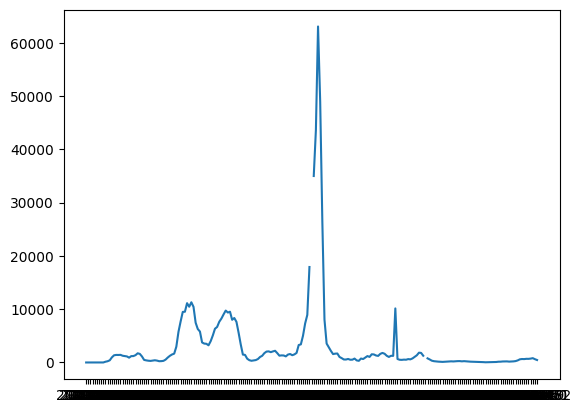

In [75]:
import matplotlib.pyplot as plt
plt.plot(columns, values)
plt.show()